IMPORT LIBRARIES

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DATA

In [46]:
stock = pd.read_csv("S&P500_Stock_Data.csv")

In [47]:
stock.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [48]:
stock.tail()

,Interest Rates,Employment,S&P 500 Price
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [49]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [50]:
stock.shape

(1000, 3)

In [51]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


VISUALIZE DATA

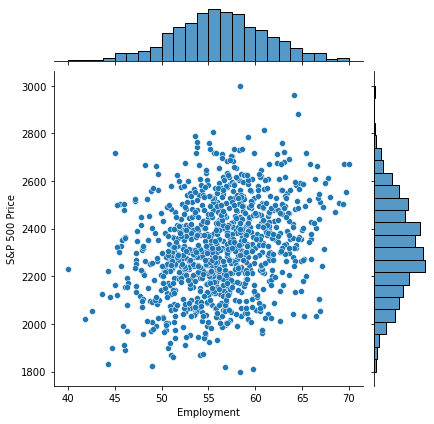

In [52]:
sns.jointplot(x='Employment',y='S&P 500 Price', data=stock)

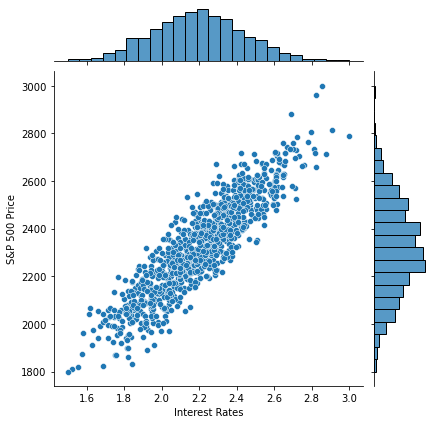

In [53]:
sns.jointplot(x='Interest Rates', y="S&P 500 Price", data=stock)

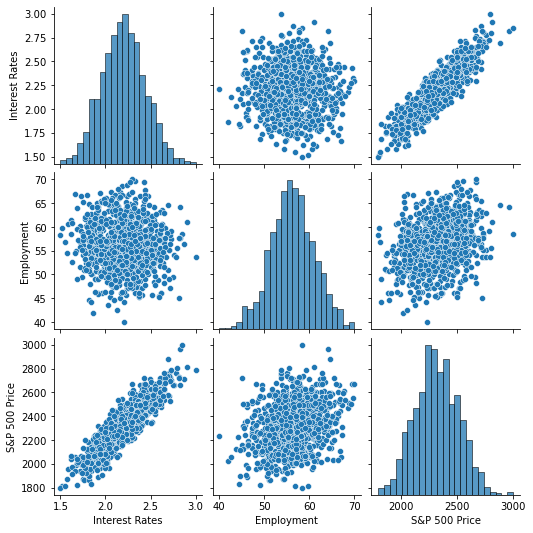

In [54]:
sns.pairplot(stock)

In [55]:
y = stock["S&P 500 Price"]

In [56]:
X  = stock[["Interest Rates", "Employment"]]

CREATE TRAIN AND TEST DATA

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
X_train

,Interest Rates,Employment
644,2.230330,61.759467
239,2.440046,49.014452
867,2.337778,58.531790
835,2.329282,55.918813
448,2.124185,55.486339
...,...,...
40,2.368019,52.153910
100,2.170306,60.421409
142,2.363962,47.329469
688,2.036988,55.593439


TRAIN MODEL

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [60]:
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
print("Linear Model Coef:",regressor.coef_)

Linear Model Coef: [726.35903019  12.38630579]


In [62]:
print("Linear Model Intercept:",regressor.intercept_)

Linear Model Intercept: 29.35132352060009


EVALUATING THE MODEL

In [63]:
y_predict = regressor.predict(X_test)

In [64]:
y_predict

array([2169.18516029, 2182.08592948, 2443.44622124, 2507.35105819,
       1860.037273  , 2267.48592665, 2026.05945476, 2324.41753452,
       1991.08188799, 2408.0888558 , 2555.51346894, 2365.27826959,
       2740.56240751, 2248.02192364, 2068.33051441, 2724.42452272,
       2474.94815798, 2409.76179345, 2208.09452294, 2148.89561339,
       2020.81909245, 2749.36630348, 2216.85774338, 2392.13786267,
       2101.31394679, 2064.42814043, 2397.08801191, 2238.4347143 ,
       2354.0815066 , 2673.06138533, 2611.22853937, 2428.64893056,
       2704.82379724, 2285.15754612, 2463.6956702 , 2254.10695289,
       2516.86254925, 2070.38176562, 2094.1129743 , 2365.98181518,
       2317.55631285, 2527.69209442, 2402.0414419 , 2501.91753354,
       2250.72842525, 2124.82461768, 2172.40908853, 2132.6395621 ,
       2337.26271492, 2362.84648476, 2456.37566266, 2165.42274682,
       2583.76490523, 2299.75762322, 2571.55139317, 2556.13721006,
       2252.56587369, 2357.94609528, 2461.59665538, 2336.70158

In [65]:
y_test

480    2213.870263
124    2192.103402
914    2496.533160
247    2483.672065
543    1818.067836
          ...     
626    2289.185468
887    2219.485183
322    2186.216985
987    2718.811585
354    2204.201677
Name: S&P 500 Price, Length: 200, dtype: float64

Text(0.5, 1.0, 'Multiple Linear Regression predictions')

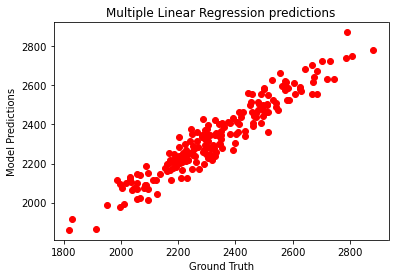

In [67]:
plt.scatter(y_test,y_predict,color="red")
plt.ylabel("Model Predictions")
plt.xlabel("Ground Truth")
plt.title("Multiple Linear Regression predictions")

In [72]:
k = X_test.shape[1]
n = len(X_test)

In [73]:
n

200

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test-y_predict)/y_test))*100

In [78]:
print("RMSE:", RMSE)

RMSE: 58.701


In [80]:
print("MSE:", MSE)

MSE: 3445.861627952271


In [82]:
print("MAE:",MAE)

MAE: 47.54165612692903


In [83]:
print("r2 score",r2)

r2 score 0.9132037993795019


In [86]:
print("MAPE:",MAPE)

MAPE: 2.048872650162841


In [87]:
from mpl_toolkits.mplot3d import Axes3D

In [89]:
x_surf, y_surf = np.meshgrid(np.linspace(stock["Interest Rates"].min(), stock["Interest Rates"].max(),100), np.linspace(stock["Employment"].min(),stock["Employment"].max(),100))

In [90]:
x_surf.shape

(100, 100)

In [92]:
onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()    } ) 

In [93]:
onlyX.shape

(10000, 2)

In [94]:
fittedY = regressor.predict(onlyX)

In [95]:
fittedY.shape

(10000,)

In [97]:
fittedY = fittedY.reshape(x_surf.shape)

Text(0.5, 0, 'Stock index price')

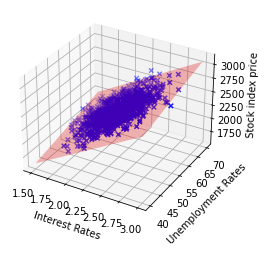

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( stock['Interest Rates'], stock['Employment'] , stock['S&P 500 Price'] , c = 'blue', marker ='x'  )
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')

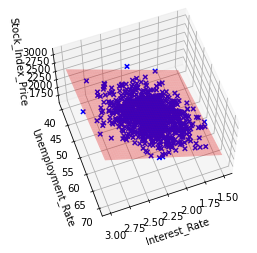

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(60, 70)
plt.show()

In [100]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,726.359030
Employment,12.386306
